In [1]:

# In[1]:


# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


In [2]:
# In[2]:


import pandas as pd

# Load the medical dataset from an Excel file
file_path = r"C:\Users\yadav\Downloads\medical_dataset.xlsx"
medical = pd.read_excel(file_path, header=0)

# Copy the file to a backup file
medical_BK = medical.copy()

In [3]:
# In[3]:


medical.head(10)

,Age,Gender,BMI,Blood Pressure,Cholesterol,Family Medical History
0,56,Female,30.6,160.7,254.9,Heart Disease
1,69,Female,33.5,150.2,170.8,NaN
2,46,Female,21.5,142.3,169.9,Cancer
3,32,Female,31.5,123.5,295.4,Hypertension
4,60,Male,30.1,174.6,257.2,Hypertension
5,25,Female,22.9,177.6,156.2,NaN
6,78,Male,38.8,115.6,209.8,Heart Disease
7,38,Female,31.4,117.5,215.0,Heart Disease
8,56,Female,33.4,133.7,261.6,Cancer
9,75,Male,37.4,130.4,187.6,NaN


In [4]:
# In[4]:


medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     100 non-null    int64  
 1   Gender                  100 non-null    object 
 2   BMI                     100 non-null    float64
 3   Blood Pressure          100 non-null    float64
 4   Cholesterol             100 non-null    float64
 5   Family Medical History  82 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [5]:
# In[5]:


medical.nunique()


Age                       51
Gender                     2
BMI                       84
Blood Pressure            92
Cholesterol               94
Family Medical History     4
dtype: int64

In [6]:
# In[6]:


medical['Family Medical History'].value_counts()

Family Medical History
Cancer           28
Heart Disease    22
Hypertension     16
Diabetes         16
Name: count, dtype: int64

In [7]:
# In[7]:


#use labelencoder to handle categorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
medical['Family Medical History']=LE.fit_transform(medical[['Family Medical History']])


In [8]:
# In[8]:


medical['Family Medical History'].value_counts()


Family Medical History
0    28
2    22
4    18
3    16
1    16
Name: count, dtype: int64

In [9]:
# In[11]:


#count the target or dependent variable by '0' &'1' and their proportion 
#(>=10:1,then the dataset is imbalance data) 
disease_count=medical['Family Medical History'].value_counts()
print("Class 0:",disease_count[0])
print("Class 1",disease_count[1])
print("Class 2",disease_count[2])
print("Class 3",disease_count[3])
print('Proportion:',round(disease_count[0]/disease_count[1]/disease_count[2]/disease_count[3],4),':1')
print('Total :',len(medical))

Class 0: 28
Class 1 16
Class 2 22
Class 3 16
Proportion: 0.005 :1
Total : 100


In [10]:
# In[12]:


# Displaying Duplicate values with in dataset
medical_dup= medical[medical.duplicated(keep='last')]

# Display the duplicate records

medical_dup


,Age,Gender,BMI,Blood Pressure,Cholesterol,Family Medical History


In [11]:
# In[13]:


medical.isnull().sum()


Age                       0
Gender                    0
BMI                       0
Blood Pressure            0
Cholesterol               0
Family Medical History    0
dtype: int64

In [12]:
# In[14]:


del medical["Gender"]
del medical["Age"]
medical.head()


,BMI,Blood Pressure,Cholesterol,Family Medical History
0,30.6,160.7,254.9,2
1,33.5,150.2,170.8,4
2,21.5,142.3,169.9,0
3,31.5,123.5,295.4,3
4,30.1,174.6,257.2,3


In [13]:
# In[15]:


medical.describe()


,BMI,Blood Pressure,Cholesterol,Family Medical History
count,100.000000,100.000000,100.000000,100.000000
mean,29.516000,134.181000,223.130000,1.800000
std,5.998362,25.554136,42.857939,1.463357
min,18.500000,90.500000,152.300000,0.000000
25%,24.175000,115.000000,185.950000,0.000000
50%,29.600000,131.750000,226.350000,2.000000
75%,33.800000,154.075000,254.150000,3.000000
max,40.000000,179.500000,296.900000,4.000000


In [14]:
# In[16]:


# Identify the independent and Target (dependent) variables

IndepVar = []
for col in medical.columns:
    if col != 'Family Medical History':
        IndepVar.append(col)

TargetVar = 'Family Medical History'

x =medical[IndepVar]
y =medical[TargetVar]


In [15]:
# In[17]:


# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 3), (30, 3), (70,), (30,))

In [16]:
# In[18]:


# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))
#since all x are indpendent variables
x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)



In [17]:
# In[21]:


#load the result dataset 
medical_results=pd.read_csv(r"C:\Users\yadav\Downloads\knnresults.csv",header=0)
medical_results.head()


,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [18]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
# In[33]:


!pip install imbalanced-learn xgboost openpyxl


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.4/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:01
   ------------------------------

In [23]:
# In[39]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Load the dataset
file_path = r"C:\Users\yadav\Downloads\medical_dataset.xlsx"
data = pd.read_excel(file_path, header=0)

# Preprocessing
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Family Medical History'] = le.fit_transform(data['Family Medical History'])

# Splitting features and target variable
X = data.drop('Family Medical History', axis=1)
y = data['Family Medical History']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for Random Forest, XGBoost, and Gradient Boosting
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0]
}

# Models initialization with refined hyperparameter tuning
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  # Adjust KNN parameters
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid_xgb, cv=3, n_jobs=-1, verbose=2),
    'Gradient Boosting': GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1, verbose=2)
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Evaluating each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    accuracy, report = evaluate_model(model, X_train_res, y_train_res, X_test, y_test)
    results[model_name] = {'Accuracy': accuracy, 'Classification Report': report}

# Displaying results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)


Training KNN...
Training Decision Tree...
Training Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Training Logistic Regression...
Training XGBoost...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Training Gradient Boosting...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model: KNN
Accuracy: 0.05
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.05        20
   macro avg       0.04      0.05      0.04        20
weighted avg       0.04      0.05      0.04        20

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.05
Classification Report:
              p

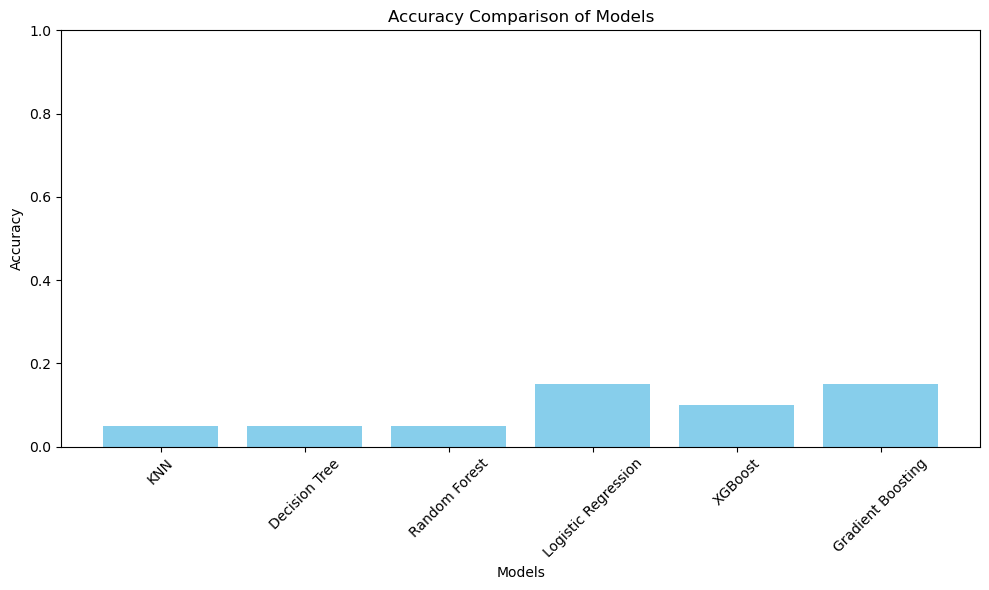

In [24]:
# In[40]:


# Plotting bar graph for accuracies
model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# In[ ]: